In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangladesh-covid-19-confirmed-cases-and-death/district-wise-confirmed-recovered-cases_06.05.2020.xlsx
/kaggle/input/bangladesh-covid-19-confirmed-cases-and-death/covid-19_district-wise-quarantine_bangladesh_24.03.2020.xls


In [28]:
import pandas as pd
covid_path = '../input/bangladesh-covid-19-confirmed-cases-and-death/covid-19_district-wise-quarantine_bangladesh_24.03.2020.xls'
covid_data = pd.read_excel(covid_path)

In [29]:
covid_data.describe()

,Shape Area,Shape Leng,Dist_code,total_quarantine
count,6.400000e+01,64.000000,64.000000,64.000000
mean,2.269045e+09,373926.006249,3692.343750,225.500000
std,1.136913e+09,125088.961548,1531.258308,205.119245
min,7.019170e+08,186948.414271,1004.000000,2.000000
25%,1.361290e+09,267397.391653,2081.750000,73.500000
50%,2.052923e+09,367862.877167,4029.500000,149.500000
75%,2.953840e+09,451685.348130,5069.250000,357.000000
max,5.758928e+09,697770.120033,6091.000000,966.000000


In [30]:
print(covid_data)

      Distname    Division      Geometry    Shape Area     Shape Leng  \
0     Bagerhat      Khulna       Polygon  3.948888e+09  451037.389860   
1    Bandarban  Chittagong       Polygon  4.595411e+09  582112.211609   
2      Barguna     Barisal       Polygon  1.517761e+09  320744.043819   
3      Barisal     Barisal       Polygon  2.489743e+09  398321.467948   
4        Bhola     Barisal  MultiPolygon  3.175528e+09  361181.817171   
..         ...         ...           ...           ...            ...   
59   Sirajganj       Dhaka       Polygon  2.492379e+09  381617.493728   
60   Sunamganj      Sylhet       Polygon  3.690865e+09  495899.257301   
61      Sylhet      Sylhet       Polygon  3.422475e+09  446465.856581   
62     Tangail       Dhaka       Polygon  3.363641e+09  387810.016357   
63  Thakurgaon     Rangpur       Polygon  1.813889e+09  344660.623757   

   district_name  Dist_code  total_quarantine  
0       Bagerhat       4001               625  
1      Bandarban       2003

In [31]:
covid_data.head()

,Distname,Division,Geometry,Shape Area,Shape Leng,district_name,Dist_code,total_quarantine
0,Bagerhat,Khulna,Polygon,3.948888e+09,451037.389860,Bagerhat,4001,625
1,Bandarban,Chittagong,Polygon,4.595411e+09,582112.211609,Bandarban,2003,5
2,Barguna,Barisal,Polygon,1.517761e+09,320744.043819,Barguna,1004,110
3,Barisal,Barisal,Polygon,2.489743e+09,398321.467948,Barisal,1006,43
4,Bhola,Barisal,MultiPolygon,3.175528e+09,361181.817171,Bhola,1009,65


In [32]:
covid_data.iloc[0]

Distname               Bagerhat
Division                 Khulna
Geometry                Polygon
Shape Area          3.94889e+09
Shape Leng               451037
district_name          Bagerhat
Dist_code                  4001
total_quarantine            625
Name: 0, dtype: object

In [33]:
covid_data['total_quarantine'].argmax()

39

In [34]:
max(covid_data['total_quarantine'])

966

In [35]:
covid_data.columns

Index(['Distname', 'Division', 'Geometry', 'Shape Area', 'Shape Leng',
       'district_name', 'Dist_code', 'total_quarantine'],
      dtype='object')

In [51]:
y = covid_data.total_quarantine

In [52]:
feature_names = ['Shape Area','Shape Leng','Dist_code']

In [53]:
X = covid_data[feature_names]

In [39]:
X.describe()

,Shape Area,Shape Leng,Dist_code
count,6.400000e+01,64.000000,64.000000
mean,2.269045e+09,373926.006249,3692.343750
std,1.136913e+09,125088.961548,1531.258308
min,7.019170e+08,186948.414271,1004.000000
25%,1.361290e+09,267397.391653,2081.750000
50%,2.052923e+09,367862.877167,4029.500000
75%,2.953840e+09,451685.348130,5069.250000
max,5.758928e+09,697770.120033,6091.000000


In [54]:
X.head()

,Shape Area,Shape Leng,Dist_code
0,3.948888e+09,451037.389860,4001
1,4.595411e+09,582112.211609,2003
2,1.517761e+09,320744.043819,1004
3,2.489743e+09,398321.467948,1006
4,3.175528e+09,361181.817171,1009


In [55]:
X.tail()

,Shape Area,Shape Leng,Dist_code
59,2.492379e+09,381617.493728,5088
60,3.690865e+09,495899.257301,6090
61,3.422475e+09,446465.856581,6091
62,3.363641e+09,387810.016357,3093
63,1.813889e+09,344660.623757,5594


In [56]:
from sklearn.tree import DecisionTreeRegressor
covid_model = DecisionTreeRegressor(random_state = 1)
covid_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [57]:
print(X.head())

     Shape Area     Shape Leng  Dist_code
0  3.948888e+09  451037.389860       4001
1  4.595411e+09  582112.211609       2003
2  1.517761e+09  320744.043819       1004
3  2.489743e+09  398321.467948       1006
4  3.175528e+09  361181.817171       1009


In [58]:
predictions = covid_model.predict(X)
print(predictions)

[625.   5. 110.  43.  65. 429. 357.  83. 766. 161. 239.  87. 385.  60.
 458. 376.  53. 105. 115. 170.  47. 536.   2. 163.  44. 101. 432. 314.
 150.  50. 568.  56. 287.  96. 300. 245.  97. 297. 357. 966. 172. 102.
 144.  59. 208.  74. 104. 675. 393. 187.  13.  72. 264. 149.  82.  20.
 394. 236.  59. 109. 128. 502. 457.  29.]


In [45]:
covid_data.head()

,Distname,Division,Geometry,Shape Area,Shape Leng,district_name,Dist_code,total_quarantine
0,Bagerhat,Khulna,Polygon,3.948888e+09,451037.389860,Bagerhat,4001,625
1,Bandarban,Chittagong,Polygon,4.595411e+09,582112.211609,Bandarban,2003,5
2,Barguna,Barisal,Polygon,1.517761e+09,320744.043819,Barguna,1004,110
3,Barisal,Barisal,Polygon,2.489743e+09,398321.467948,Barisal,1006,43
4,Bhola,Barisal,MultiPolygon,3.175528e+09,361181.817171,Bhola,1009,65


In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


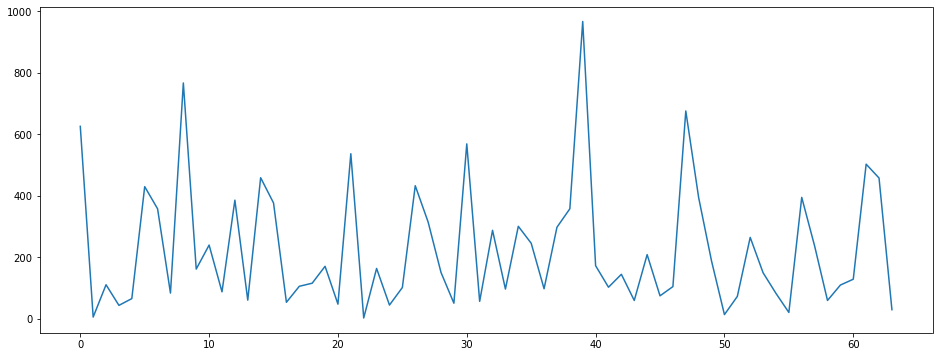

In [47]:
plt.figure(figsize=(16,6))
sns.lineplot(data=covid_data.total_quarantine)

Text(0.5, 0, 'Division')

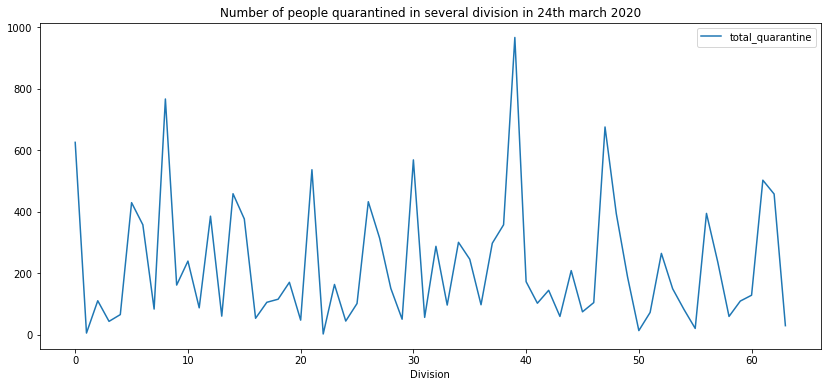

In [60]:
plt.figure(figsize=(14,6))
plt.title("Number of people quarantined in several division in 24th march 2020")
sns.lineplot(data = covid_data['total_quarantine'],label="total_quarantine")
plt.xlabel("Division")

In [68]:
new_path = '../input/bangladesh-covid-19-confirmed-cases-and-death/district-wise-confirmed-recovered-cases_06.05.2020.xlsx'

In [69]:
new_data = pd.read_excel(new_path)

In [70]:
new_data.describe()

,Objectid,Dist_Code,Confirmed_cases \nUpto 05 April,Confirmed_cases \nUpto 06 April,Confirmed_cases \nUpto 07 April,Confirmed_cases Upto 08 April,Confirmed_cases Upto 09 April,Confirmed_cases Upto 11 April,Confirmed_cases Upto 13 April,Confirmed_cases Upto 14 April,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
count,64.000000,64.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,32.500000,3692.343750,2.707692,3.384615,5.046154,6.707692,10.153846,14.461538,23.200000,28.861538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,18.618987,1531.258308,12.782707,15.877158,23.374954,31.513749,48.366514,67.076700,105.933381,130.670492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,16.750000,2081.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,32.500000,4029.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,48.250000,5069.250000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,5.000000,7.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,64.000000,6091.000000,88.000000,110.000000,164.000000,218.000000,330.000000,470.000000,754.000000,938.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
new_data

,Objectid,Division,District_name,Dist_Code,Confirmed_cases \nUpto 05 April,Confirmed_cases \nUpto 06 April,Confirmed_cases \nUpto 07 April,Confirmed_cases Upto 08 April,Confirmed_cases Upto 09 April,Confirmed_cases Upto 11 April,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,3.0,Barisal,Barguna,1004.0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Barisal,Barisal,1006.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,Barisal,Bhola,1009.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.0,Barisal,Jhalokati,1042.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51.0,Barisal,Patuakhali,1078.0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,20.0,Sylhet,Habiganj,6036.0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,36.0,Sylhet,Maulvibazar,6058.0,0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,61.0,Sylhet,Sunamganj,6090.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,62.0,Sylhet,Sylhet,6091.0,0,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data.head()